### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
plt.style.use('dark_background')

### Generate Dummy Data

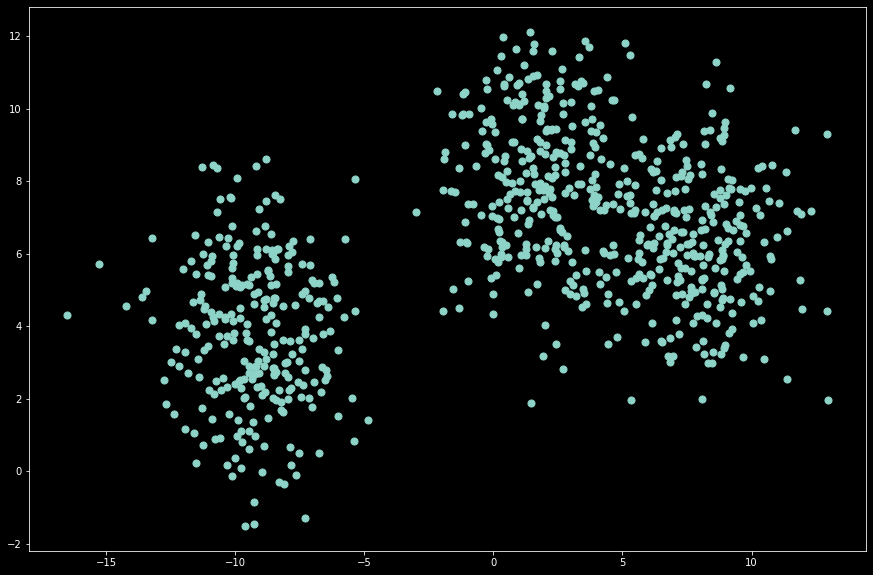

In [7]:
X, _ = make_blobs(n_samples=800, n_features=2,
                 centers=3, cluster_std=1.9,
                 shuffle=True, random_state=20)

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50)
plt.show()

### Build the clustering model

In [8]:
from sklearn.cluster import KMeans # DBSCAN, AgglomerativeClustering

In [9]:
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
y_km = km.fit_predict(X)

In [24]:
df = pd.DataFrame({
    'X1': X[:,0],
    'X2': X[:,1],
    'Labels': y_km,
})

In [25]:
df

,X1,X2,Labels
0,1.543633,7.295645,2
1,8.633911,7.300079,1
2,3.759723,8.726375,2
3,6.549432,3.562563,1
4,-10.372268,4.259737,0
...,...,...,...
795,4.241809,9.187808,2
796,5.606792,5.863525,1
797,1.317934,7.469066,2
798,-6.501927,2.524086,0


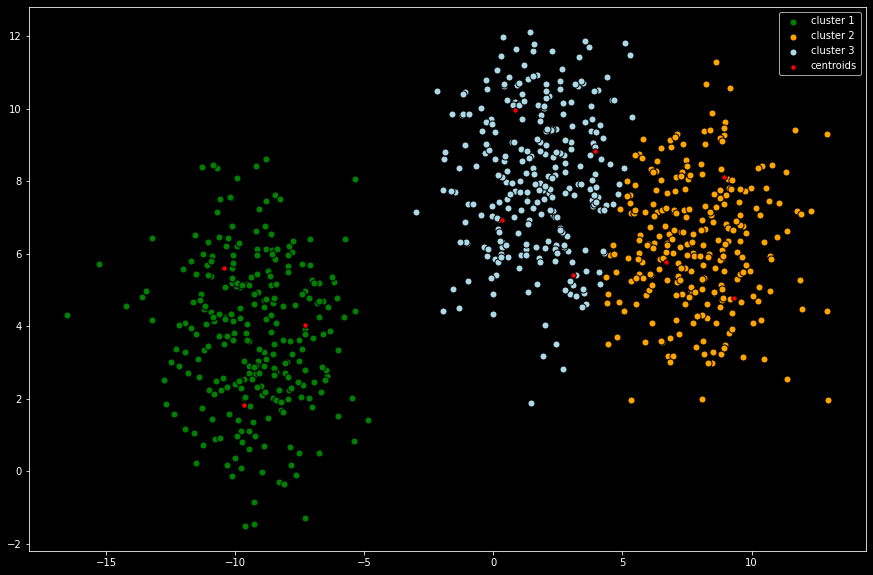

In [26]:
plt.figure(figsize=(15,10))
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.show()

### Elbow Method

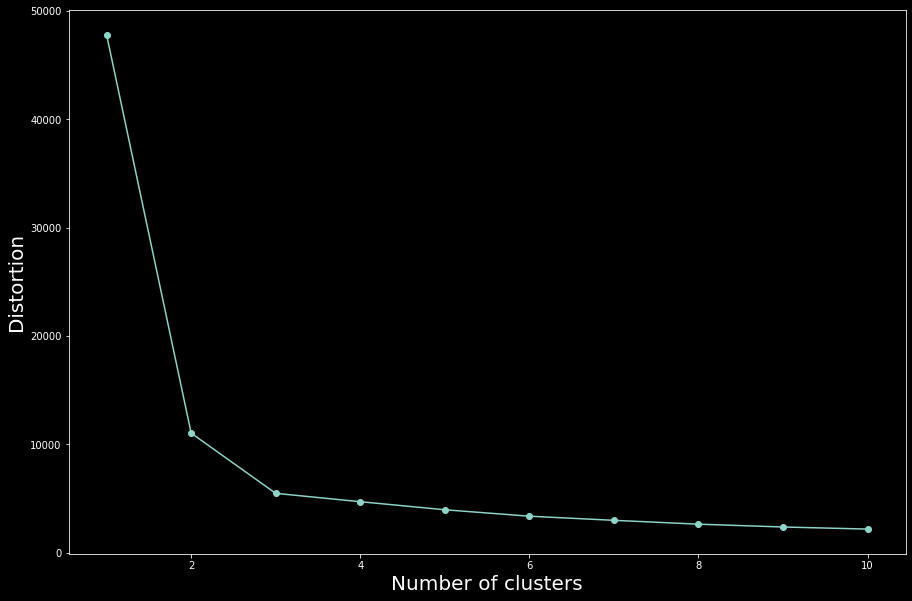

In [27]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) 

plt.figure(figsize=(15,10))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Distortion', fontsize=20)
plt.show()

- Inertia is the sum of squared distances of samples to their closest cluster center.
- Elbow method shows that the best K is 3